### Change data to pkl

In [1]:
import pandas as pd
import os
import numpy as np
from collections import OrderedDict
from tqdm.notebook import tqdm
import pickle

# dataPath = "../../dataset1"
dataPath = "../../MLH/Assignment2/dataset"

In [2]:
# pd. __version__

In [3]:
def load_data(dataPath):
    patients = OrderedDict()
    for patient in tqdm(os.listdir(dataPath)):
        df = pd.read_csv(dataPath + '/' + patient, sep='|')
        patients[patient[:-4]] = df
    return patients

patients = load_data(dataPath)

  0%|          | 0/40336 [00:00<?, ?it/s]

In [4]:
with open('patients.pkl', 'wb') as f:
    pickle.dump(patients, f)

### Load pkl data

In [5]:
import pandas as pd
import os
import numpy as np
from collections import OrderedDict
from tqdm.notebook import tqdm
import pickle

with open('patients.pkl', 'rb') as f:
    patients = pickle.load(f)

In [6]:
mergedData = pd.concat(list(patients.values()))

In [7]:
totalLen = mergedData.shape[0]

In [8]:
nans = []
values = []

for c in mergedData.columns:
    nans.append(100*mergedData[c].isnull().sum()/totalLen)
    values.append(100 - 100*mergedData[c].isnull().sum()/totalLen)

In [9]:
bar_label = mergedData.columns

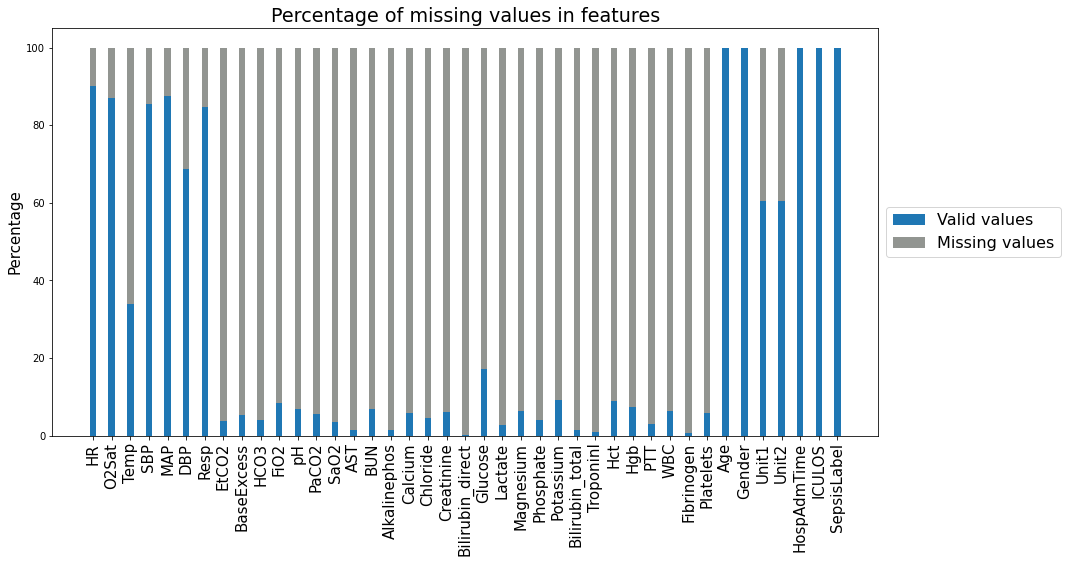

In [10]:
import matplotlib.pyplot as plt

labels = mergedData.columns
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 7.5)
plt.rcParams['font.size'] = '16'
ax.bar(labels, values, width, label='Valid values')
ax.bar(labels, nans, width, bottom=values,
       label='Missing values', color='#929591')

ax.set_ylim([0, 105])
ax.set_ylabel('Percentage', size=15)
ax.set_title('Percentage of missing values in features')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.tick_params(axis='x', rotation=90)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

plt.show()

### Get patients with sepsis

In [11]:
sepsisPatients = {}
nonSepsisPatients = {}

In [12]:
for pid, data in tqdm(patients.items()):
    if data['SepsisLabel'].sum() >= 1:
        sepsisPatients[pid] = data.iloc[:min(data[data['SepsisLabel'] == 1].index)-6]
    else:
        nonSepsisPatients[pid] = data

  0%|          | 0/40336 [00:00<?, ?it/s]

In [13]:
len(sepsisPatients), len(nonSepsisPatients)

(2932, 37404)

#### Check sepsis patients missing values

In [14]:
sepsisMergedData = pd.concat(list(sepsisPatients.values()))

In [15]:
sepsisTotalLen = sepsisMergedData.shape[0]

In [16]:
nans = []
values = []

for c in sepsisMergedData.columns:
    nans.append(100*sepsisMergedData[c].isnull().sum()/sepsisTotalLen)
    values.append(100 - 100*sepsisMergedData[c].isnull().sum()/sepsisTotalLen)

In [17]:
bar_label = sepsisMergedData.columns

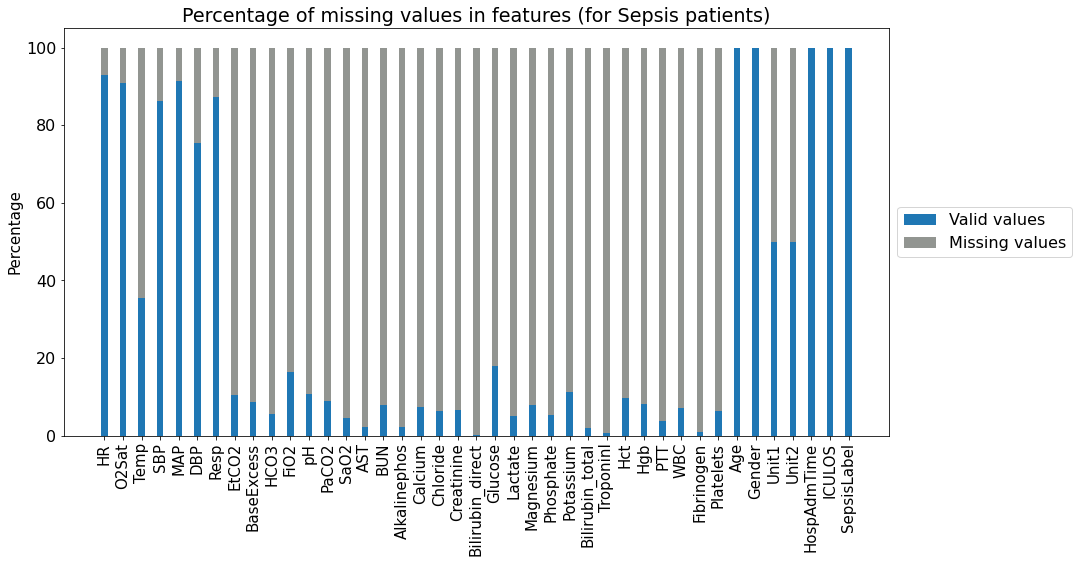

In [18]:
import matplotlib.pyplot as plt

labels = sepsisMergedData.columns
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 7.5)
plt.rcParams['font.size'] = '16'
ax.bar(labels, values, width, label='Valid values')
ax.bar(labels, nans, width, bottom=values,
       label='Missing values', color='#929591')

ax.set_ylim([0, 105])
ax.set_ylabel('Percentage', size=15)
ax.set_title('Percentage of missing values in features (for Sepsis patients)')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.tick_params(axis='x', rotation=90)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

plt.show()

#### Check non-sepsis patients missing values

In [19]:
nonSepsisMergedData = pd.concat(list(nonSepsisPatients.values()))

In [20]:
nonSepsisTotalLen = nonSepsisMergedData.shape[0]

In [21]:
nans = []
values = []

for c in nonSepsisMergedData.columns:
    nans.append(100*nonSepsisMergedData[c].isnull().sum()/nonSepsisTotalLen)
    values.append(100 - 100*nonSepsisMergedData[c].isnull().sum()/nonSepsisTotalLen)

In [22]:
bar_label = nonSepsisMergedData.columns

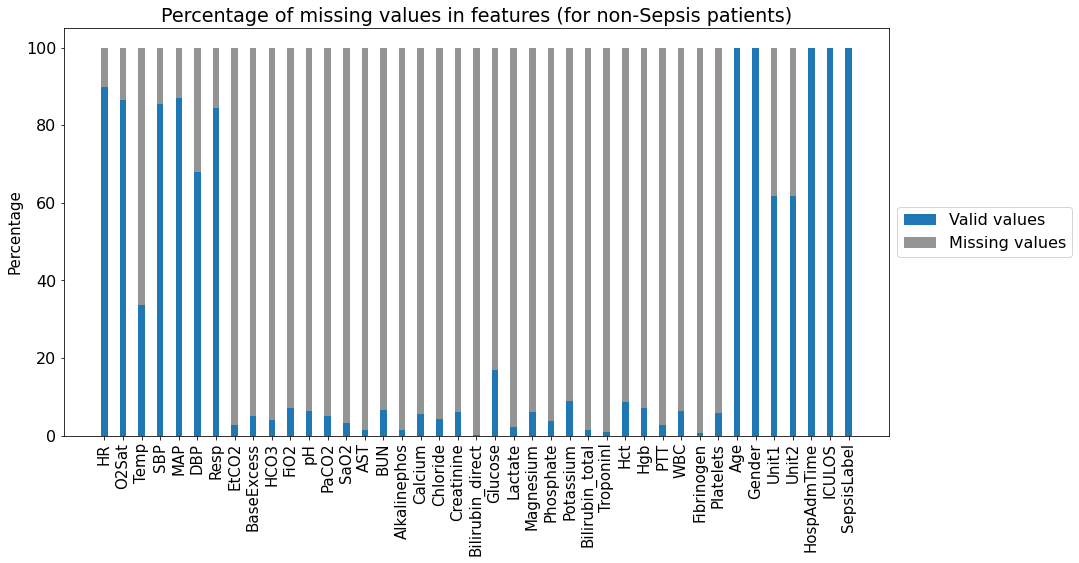

In [23]:
import matplotlib.pyplot as plt

labels = nonSepsisMergedData.columns
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 7.5)
plt.rcParams['font.size'] = '16'
ax.bar(labels, values, width, label='Valid values')
ax.bar(labels, nans, width, bottom=values,
       label='Missing values', color='#929591')

ax.set_ylim([0, 105])
ax.set_ylabel('Percentage', size=15)
ax.set_title('Percentage of missing values in features (for non-Sepsis patients)')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.tick_params(axis='x', rotation=90)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

plt.show()

### Filling missing values

#### Backward fill and forward fill

In [24]:
# Temporal data, missing completely at random
# First using last observation carried forward (LOCF) 
# and then Using next observation carried backward (NOCB)
sepsisPatients_partial_filled = {}
nonSepsisPatients_partial_filled = {}
for pid, data in tqdm(patients.items()):
    data = data.bfill().ffill()
    if data['SepsisLabel'].sum() >= 1:
        sepsisPatients_partial_filled[pid] = data.iloc[:min(data[data['SepsisLabel'] == 1].index)-6]
    else:
        nonSepsisPatients_partial_filled[pid] = data

  0%|          | 0/40336 [00:00<?, ?it/s]

In [25]:
len(sepsisPatients), len(nonSepsisPatients)

(2932, 37404)

#### Filling with median

In [26]:
# For the data completely missing for the patient, using the median across Sepsis/non-Sepsis patients
merged_sepsis_partial_filled = pd.concat(list(sepsisPatients_partial_filled.values()))
merged_nonsepsis_partial_filled = pd.concat(list(nonSepsisPatients_partial_filled.values()))

In [27]:
sepsis_filled = {}
sepsis_median = merged_sepsis_partial_filled.median()
for pid, data in sepsisPatients_partial_filled.items():
    data = data.fillna(sepsis_median)
    sepsis_filled[pid] = data

In [28]:
nonsepsis_filled = {}
nonsepsis_median = merged_nonsepsis_partial_filled.median()
for pid, data in nonSepsisPatients_partial_filled.items():
    data = data.fillna(nonsepsis_median)
    nonsepsis_filled[pid] = data

#### Save filled data as pkl

In [29]:
with open('sepsis_filled.pkl', 'wb') as f:
    pickle.dump(sepsis_filled, f)
    
with open('nonsepsis_filled.pkl', 'wb') as f:
    pickle.dump(nonsepsis_filled, f)

In [30]:
sepsis_filled = pd.read_pickle('sepsis_filled.pkl')
nonsepsis_filled = pd.read_pickle('nonsepsis_filled.pkl')

In [31]:
sepsis_pred_filled = {}
nonsepsis_pred_filled = {}
for pid, data in sepsis_filled.items():
    sepsis_pred_filled[pid] = data.mean()

for pid, data in nonsepsis_filled.items():
    nonsepsis_pred_filled[pid] = data.mean()

In [32]:
merged_train_mat_sepsis = pd.concat(list(sepsis_pred_filled.values()), axis=1).transpose()
merged_train_mat_sepsis

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,101.794872,99.076923,36.483590,122.282051,82.589744,64.179487,20.166667,32.000000,-1.333333,23.307692,...,11.146154,325.000000,96.256410,66.36,1.0,0.0,1.0,-162.76,25.0,0.0
1,93.743644,91.639831,37.050000,131.336864,99.260593,81.067797,16.125000,28.902542,0.000000,25.000000,...,14.858051,274.932203,201.029661,59.00,0.0,0.0,1.0,-11.52,118.5,0.0
2,115.000000,93.000000,36.720000,89.000000,71.000000,61.000000,14.000000,32.000000,-12.000000,11.000000,...,8.700000,325.000000,421.000000,60.42,1.0,1.0,0.0,-25.95,1.5,1.0
3,58.431034,96.448276,37.091379,124.267241,83.844828,60.668103,17.245690,32.000000,0.000000,25.000000,...,18.275862,325.000000,226.896552,70.00,1.0,0.0,1.0,-227.70,58.5,0.0
4,115.571429,96.685714,38.192857,110.657143,79.742857,59.685714,16.700000,38.785714,0.000000,25.000000,...,5.151429,325.000000,72.114286,38.00,1.0,1.0,0.0,-63.61,18.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2928,93.086957,98.326087,38.150000,106.804348,66.775652,62.000000,19.000000,32.000000,0.000000,22.000000,...,7.069565,325.000000,207.434783,76.67,0.0,1.0,0.0,-0.02,12.0,0.0
2929,90.940678,98.966102,36.846102,81.872881,68.830508,51.449153,18.661017,32.000000,-2.728814,18.864407,...,12.472881,325.000000,180.000000,68.63,1.0,1.0,0.0,-0.07,30.0,0.0
2930,105.545455,99.909091,36.140909,131.136364,98.045455,82.227273,19.363636,25.090909,-5.500000,20.600000,...,9.518182,131.818182,95.818182,52.00,1.0,0.0,1.0,-29.08,8.0,0.0


In [51]:
merged_train_mat_sepsis = pd.concat(list(sepsis_pred_filled.values()), axis=1).transpose()
merged_train_mat_nonsepsis = pd.concat(list(nonsepsis_pred_filled.values()), axis=1).transpose()
train_mat = pd.concat([merged_train_mat_sepsis, merged_train_mat_nonsepsis], ignore_index=True)

In [52]:
# 40000 rows * 41 columns
train_mat

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,101.794872,99.076923,36.483590,122.282051,82.589744,64.179487,20.166667,32.000000,-1.333333,23.307692,...,11.146154,325.000000,96.256410,66.36,1.0,0.0,1.0,-162.76,25.0,0.0
1,93.743644,91.639831,37.050000,131.336864,99.260593,81.067797,16.125000,28.902542,0.000000,25.000000,...,14.858051,274.932203,201.029661,59.00,0.0,0.0,1.0,-11.52,118.5,0.0
2,115.000000,93.000000,36.720000,89.000000,71.000000,61.000000,14.000000,32.000000,-12.000000,11.000000,...,8.700000,325.000000,421.000000,60.42,1.0,1.0,0.0,-25.95,1.5,1.0
3,58.431034,96.448276,37.091379,124.267241,83.844828,60.668103,17.245690,32.000000,0.000000,25.000000,...,18.275862,325.000000,226.896552,70.00,1.0,0.0,1.0,-227.70,58.5,0.0
4,115.571429,96.685714,38.192857,110.657143,79.742857,59.685714,16.700000,38.785714,0.000000,25.000000,...,5.151429,325.000000,72.114286,38.00,1.0,1.0,0.0,-63.61,18.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40331,73.044444,96.000000,37.024444,95.400000,68.836444,63.000000,23.977778,34.000000,0.000000,27.022222,...,8.806667,271.000000,200.222222,61.03,0.0,0.0,1.0,-0.03,23.0,0.0
40332,93.622807,99.736842,36.256140,128.587719,98.087719,78.114035,17.052632,34.000000,0.000000,25.000000,...,7.336842,271.000000,313.649123,77.00,0.0,0.0,1.0,-11.76,29.0,0.0
40333,67.042373,98.347458,37.212712,138.381356,85.194915,58.779661,17.940678,34.000000,0.000000,25.000000,...,7.210169,271.000000,61.440678,77.00,0.0,0.0,1.0,-28.15,30.0,0.0
40334,74.000000,95.761905,36.876190,156.190476,99.404762,65.547619,21.000000,34.000000,0.000000,25.000000,...,11.600000,271.000000,117.000000,67.00,0.0,0.0,1.0,-11.93,11.0,0.0


#### Normalization(MinMax)

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
target_columns = train_mat.columns[:-6]

In [55]:
train_mat[target_columns] = MinMaxScaler().fit_transform(train_mat[target_columns])

In [56]:
train_mat

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,0.498221,0.987355,0.629852,0.454594,0.334519,0.235079,0.316804,0.244444,0.496495,0.369525,...,0.035947,0.174051,0.039800,0.608837,1.0,0.0,1.0,-162.76,25.0,0.0
1,0.442154,0.885477,0.689474,0.501755,0.426560,0.334735,0.250000,0.210028,0.521989,0.403683,...,0.048026,0.144001,0.085000,0.523256,0.0,0.0,1.0,-11.52,118.5,0.0
2,0.590178,0.904110,0.654737,0.281250,0.270531,0.216318,0.214876,0.244444,0.292543,0.121105,...,0.027987,0.174051,0.179896,0.539767,1.0,1.0,0.0,-25.95,1.5,1.0
3,0.196246,0.951346,0.693829,0.464934,0.341448,0.214359,0.268524,0.244444,0.521989,0.403683,...,0.059149,0.174051,0.096159,0.651163,1.0,0.0,1.0,-227.70,58.5,0.0
4,0.594158,0.954599,0.809774,0.394048,0.318801,0.208562,0.259504,0.319841,0.521989,0.403683,...,0.016439,0.174051,0.029385,0.279070,1.0,1.0,0.0,-63.61,18.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40331,0.298010,0.945205,0.686784,0.314583,0.258586,0.228119,0.379798,0.266667,0.521989,0.444500,...,0.028334,0.141641,0.084652,0.546860,0.0,0.0,1.0,-0.03,23.0,0.0
40332,0.441313,0.996395,0.605910,0.487436,0.420084,0.317306,0.265333,0.266667,0.521989,0.403683,...,0.023551,0.141641,0.133585,0.732558,0.0,0.0,1.0,-11.76,29.0,0.0
40333,0.256213,0.977362,0.706601,0.538445,0.348902,0.203216,0.280011,0.266667,0.521989,0.403683,...,0.023138,0.141641,0.024780,0.732558,0.0,0.0,1.0,-28.15,30.0,0.0
40334,0.304664,0.941944,0.671178,0.631200,0.427355,0.243153,0.330579,0.266667,0.521989,0.403683,...,0.037424,0.141641,0.048749,0.616279,0.0,0.0,1.0,-11.93,11.0,0.0


In [39]:
test_min = train_mat.min(axis = 0)
test_max = train_mat.max(axis = 0)
print(test_min[:-6], test_max[:-6]) # all features are now between [0,1]

## Prediction

In [152]:
## split train-test datasets
from sklearn.model_selection import train_test_split

X = train_mat[train_mat.columns[:-6]][train_mat.isna().sum(axis=1) == 0]
y = pd.concat([pd.DataFrame(np.ones(len(merged_train_mat_sepsis))), 
                     pd.DataFrame(np.zeros(len(merged_train_mat_nonsepsis)))], 
                    ignore_index= True)[train_mat.isna().sum(axis=1) == 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
from imblearn.over_sampling import SMOTE

def smote(X, y, balanced_ratio=0.5):
    n_pos = int(np.sum(y==0)*balanced_ratio)
    model = SMOTE(sampling_strategy={1:n_pos})
    n_X, n_y = model.fit_resample(X, y)
    return n_X, n_y

In [157]:
smote_X_1, smote_y_1 = smote(X_train, y_train, balanced_ratio=1)

In [158]:
rfc = RandomForestClassifier(max_depth=20, n_estimators=10)
rfc.fit(smote_X_1, smote_y_1)
pred = rfc.predict(X_test)
f1_rf = f1_score(pred, y_test)

<ipython-input-158-4187a89d3274>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(smote_X_1, smote_y_1)


In [159]:
f1_rf

0.9942669942669943

In [160]:
clf = LogisticRegression(max_iter=1000)
clf.fit(smote_X_1, smote_y_1)
pred = clf.predict(X_test)
f1_lr = f1_score(pred, y_test)

/Users/wdgao/opt/anaconda3/envs/AML/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [161]:
f1_lr

0.6299303944315546